# ACA-Py & ACC-Py Basic Template

## Copy this template into the root folder of your notebook workspace to get started

### Imports

In [1]:
from aries_cloudcontroller import AriesAgentController
import os
from termcolor import colored
import asyncio
import time

from aiohttp import ClientSession

from libs.performance_service import PerformanceService

### Initialise the Agent Controller

In [2]:
api_key = os.getenv("ACAPY_ADMIN_API_KEY")
admin_url = os.getenv("ADMIN_URL")

print(f"Initialising a controller with admin api at {admin_url} and an api key of {api_key}")
agent_controller = AriesAgentController(admin_url,api_key)


Initialising a controller with admin api at http://issuer-agent:3021 and an api key of adminApiKey


### Start a Webhook Server

In [3]:
webhook_port = int(os.getenv("WEBHOOK_PORT"))
webhook_host = "0.0.0.0"

await agent_controller.init_webhook_server(webhook_host, webhook_port)

print(f"Listening for webhooks from agent at http://{webhook_host}:{webhook_port}")

Listening for webhooks from agent at http://0.0.0.0:3010


## Store Issuing Schema and Cred Def Identifiers

If you intend for this agent to issue credentials you should first initialise your agent as an issuer and author the relevant identifiers to the public ledger. The issuer_initialisation recipe notebook can be duplicated and used as a starting point.

Once schema and cred def identifiers are created copy across and store in variables as illustrated in the cell below. Be sure to use unique names for each variable.

In [4]:
size1_schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:size1:0.0.1'
size1_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:8:default'
size1_rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:8:revocable'

size2_schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:size2:0.0.1'
size2_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:9:default'
size2_rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:9:revocable'

size3_schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:size3:0.0.1'
size3_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:10:default'
size3_rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:10:revocable'

size4_schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:size4:0.0.1'
size4_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:11:default'
size4_rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:11:revocable'

size5_schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:size5:0.0.1'
size5_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:12:default'
size5_rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:12:revocable'

size6_schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:size6:0.0.1'
size6_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:13:default'
size6_rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:13:revocable'

size7_schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:size7:0.0.1'
size7_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:14:default'
size7_rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:14:revocable'




## Init Performance Service

In [5]:
performance_service = PerformanceService(agent_controller, iterations=100)

## Establish Connection

Before you can issue a credential you must first establish a connection across which the credential will be issued to a holder. (see recipes/connection)

In [6]:
# Alias for invited connection
alias = "Friend"
auto_accept = "true"
# Use public DID?
public = "false"
# Should this invitation be usable by multiple invitees?
multi_use = "false"

invitation_response = await agent_controller.connections.create_invitation(alias, auto_accept, public, multi_use)
# Is equivalent to above. Arguments are optionally
# invitation_response = await agent_controller.connections.create_invitation()



# You will use this identifier to issue a credential across this connection
connection_id = invitation_response["connection_id"]

invitation = invitation_response["invitation"]
## Copy this output
print(invitation)
print(connection_id)

{'@type': 'did:sov:BzCbsNYhMrjHiqZDTUASHg;spec/connections/1.0/invitation', '@id': '843d50e1-e861-4ec3-8620-25ae01b2f027', 'label': 'Issuer', 'serviceEndpoint': 'http://issuer-agent:3020', 'recipientKeys': ['8ZjDVHABDMxN973vYVhFifdoz9y3DZYL492aK3mUg1Vg']}
bf7d4d2b-1398-4079-a4fa-7cfecf815892
Connection ID: bf7d4d2b-1398-4079-a4fa-7cfecf815892 is now active.


In [7]:
connection_id = "bf7d4d2b-1398-4079-a4fa-7cfecf815892"

# Attribute Size Experiment

In [9]:
experiment = performance_service.new_experiment("Attribute Size - Non Revocable")



In [10]:
revocable_experiment = performance_service.new_experiment("Attribute Size - Revocable")

## Define Performance Test - 0.1kb

In [11]:
credential_attributes = [
    {"name": "image", "value": 128*"0"},
]

In [12]:

name = "128B"


test = {"name": name, "schema_id": size1_schema_id, "cred_def_id": size1_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(experiment, test, connection_id)

Average :  0.7421992142800354


In [13]:

test = {"name": name, "schema_id": size1_schema_id, "cred_def_id": size1_rev_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(revocable_experiment, test, connection_id)


Average :  1.010123782519986


## Define Performance Test - 0.5kb

In [14]:
credential_attributes = [
    {"name": "image", "value": 512*"0"},
]

name = "512B"

In [15]:



test = {"name": name, "schema_id": size2_schema_id, "cred_def_id": size2_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(experiment, test, connection_id)

Average :  0.7588296626200463


In [16]:


test = {"name": name, "schema_id": size2_schema_id, "cred_def_id": size2_rev_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(revocable_experiment, test, connection_id)


Average :  1.04755196625998


## Define Performance Test - 1kb

In [17]:
credential_attributes = [
    {"name": "image", "value": 1024*"0"},
]
name = "1kB"

In [18]:




test = {"name": name, "schema_id": size3_schema_id, "cred_def_id": size3_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(experiment, test, connection_id)

Average :  0.60604519521994


In [19]:


test = {"name": name, "schema_id": size3_schema_id, "cred_def_id": size3_rev_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(revocable_experiment, test, connection_id)


Average :  1.0152578131099927


## Define Performance Test - 16kb

In [20]:
credential_attributes = [
    {"name": "image", "value": 16 * 1024*"0"},
]

name = "16kB"

In [21]:



test = {"name": name, "schema_id": size4_schema_id, "cred_def_id": size4_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(experiment, test, connection_id)

Average :  0.7165110925200042


In [22]:


test = {"name": name, "schema_id": size4_schema_id, "cred_def_id": size4_rev_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(revocable_experiment, test, connection_id)


Average :  1.251941262279979


## Define Performance Test - 64kb

In [23]:
credential_attributes = [
    {"name": "image", "value": 64*1024*"0"},
]
name = "64kB"

In [24]:




test = {"name": name, "schema_id": size5_schema_id, "cred_def_id": size5_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(experiment,test, connection_id)

Average :  1.1442755796500024


In [25]:


test = {"name": name, "schema_id": size5_schema_id, "cred_def_id": size5_rev_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(revocable_experiment, test, connection_id)


Average :  1.6424007953500495


## Define Performance Test - 128kb

In [26]:
credential_attributes = [
    {"name": "image", "value": 128*1024*"0"},
]

name = "128kB"

In [27]:



test = {"name": name, "schema_id": size6_schema_id, "cred_def_id": size6_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(experiment,test, connection_id)

Average :  1.7599949260899939


In [28]:


test = {"name": name, "schema_id": size6_schema_id, "cred_def_id": size6_rev_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(revocable_experiment, test, connection_id)


Average :  2.1817698004800876


## Define Performance Test - 256kb

In [29]:
credential_attributes = [
    {"name": "image", "value": 1024*256*"0"},
]
name = "256kB"

In [30]:




test = {"name": name, "schema_id": size7_schema_id, "cred_def_id": size7_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(experiment, test, connection_id)

Average :  2.7849772056000073


In [31]:


test = {"name": name, "schema_id": size7_schema_id, "cred_def_id": size7_rev_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(revocable_experiment, test, connection_id)


Average :  3.30249226308998


## Define Performance Test - 512kb

### Not able to run past ~320kb until update webhook server client_max_size

In [ ]:
# credential_attributes = [
#     {"name": "1", "value": 1024*320*"0"},
# ]

In [ ]:

# name = "512kb"


# test = {"name": name,"schema_id": schema_id, "cred_def_id": cred_def_id, "attributes": credential_attributes}

# await performance_service.run(test, connection_id)

In [ ]:

# name = "Issuance - 256kb - Revocable"

# test = {"name": name, "iterations": iterations, "schema_id": schema_id, "cred_def_id": rev_cred_def_id, "attributes": credential_attributes}

# await performance_service.run(test, connection_id)


## Plot Results

### Non Revocable

In [32]:
data = []
labels = []
non_revocable_averages = []
for result in experiment["results"]:
    
    millitimings = [i * 1000 for i in result["timings"]]
    data.append(millitimings)
    non_revocable_averages.append(result["average"] * 1000)
    labels.append(result["name"])
    


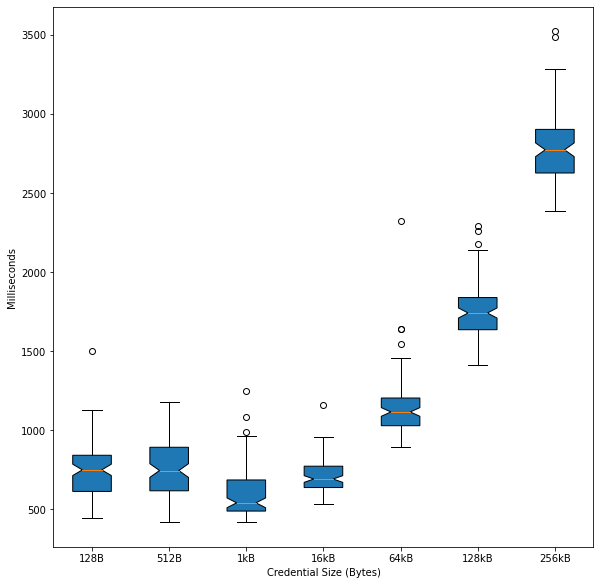

In [33]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 

 
fig = plt.figure(figsize =(10, 10))
 
# Creating axes instance
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 
 
# Creating plot`
bp = ax.boxplot(data, patch_artist = True,
                notch ='True')

# x-axis labels
ax.set_xticklabels(labels)

plt.ylabel("Milliseconds")
plt.xlabel("Credential Size (Bytes)")

plt.savefig("results/issuance/attribute_size/box_plot_non_revocable.png")

### Revocable

In [34]:
data = []
labels = []
revocable_averages = []
for result in revocable_experiment["results"]:
    
    millitimings = [i * 1000 for i in result["timings"]]
    data.append(millitimings)
    revocable_averages.append(result["average"] * 1000)
    labels.append(result["name"])
    


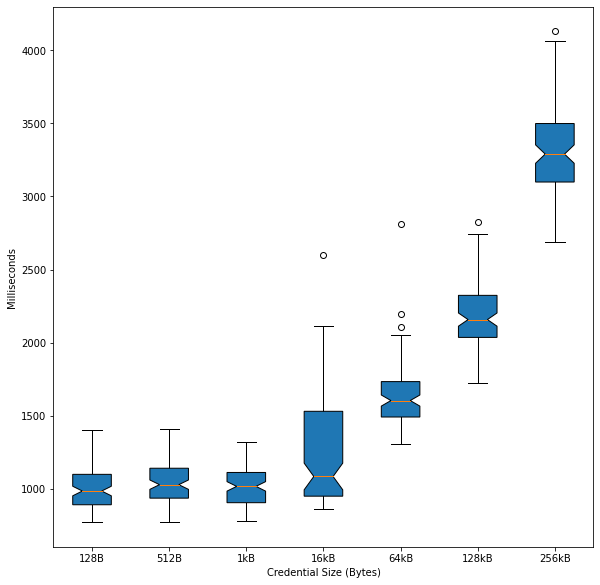

In [35]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 

 
fig = plt.figure(figsize =(10, 10))
 
# Creating axes instance
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 
 
# Creating plot`
bp = ax.boxplot(data, patch_artist = True,
                notch ='True')

# x-axis labels
ax.set_xticklabels(labels)

plt.ylabel("Milliseconds")
plt.xlabel("Credential Size (Bytes)")

plt.savefig("results/issuance/attribute_size/box_plot_revocable.png")

## Averages

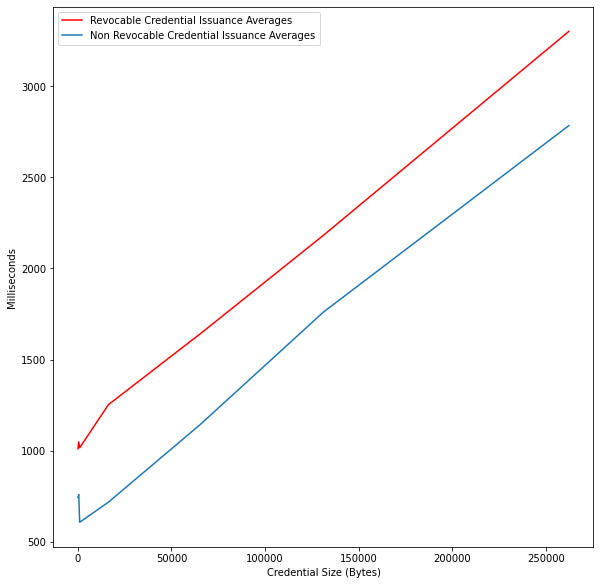

In [38]:
fig = plt.figure(figsize =(10, 10))
 
# Creating axes instance
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 

# avg_ploy = plt.plot(labels, revocable_averages, non_revoked_averages)

plot_points = [128, 512, 1024, 16*1024, 64*1024, 128 * 1024, 256 * 1024]

plt.plot(plot_points, revocable_averages,'r-',label='Revocable Credential Issuance Averages')
plt.plot(plot_points, non_revocable_averages,label='Non Revocable Credential Issuance Averages')

plt.ylabel("Milliseconds")
plt.xlabel("Credential Size (Bytes)")


plt.legend()
plt.savefig("results/issuance/attribute_size/averages.png")

## Terminate Controller

Whenever you have finished with this notebook, be sure to terminate the controller. This is especially important if your business logic runs across multiple notebooks.

In [39]:
await agent_controller.terminate()

In [40]:
performance_service.save_experiments()